# Flare 2023/06/09

In [1]:
import numpy as np
# import copy
# import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
# import sunpy
# from scipy.io import readsav
# import cocopy as cp
# from ISPy.io import solarnet
# import sunpy.map
# import astropy.units as u
# from scipy.io import readsav as rs
# from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
# import datetime as dt
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from matplotlib.collections import PolyCollection
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi3 as un

In [2]:
import os

# Specify the path to the folder you want to list files from
folder_path = "E:/solar flares/data/2023-06-09/fits/"

maximum = 1000 # to be determined 

def timeframe_to_filename_fits(frame):
    if frame <0 or frame > maximum:
        raise IndexError(f'frame number {frame} is not in [0, {max}).')
    else:
        return f"{folder_path}nb_4846_2023-06-09T17_01_03_17_01_03=0-123_mixed_corrected_export2023-07-24T15_24_25_im.fits"
ttff = timeframe_to_filename_fits



In [3]:
head0 = f.getheader(ttff(0))
maximum = head0['NAXIS5']
print(maximum)
head0

124


SIMPLE  =                    T / Written by IDL:  Fri Jun 23 19:46:07 2023      
BITPIX  =                  -32 /                                                
NAXIS   =                    5 / Number of data axes                            
NAXIS1  =                 1987 / Number of positions along axis 1               
NAXIS2  =                 2097 / Number of positions along axis 2               
NAXIS3  =                   36 / Number of positions along axis 3               
NAXIS4  =                    1 / Number of positions along axis 4               
NAXIS5  =                  124 / Number of positions along axis 5               
EXTEND  =                    T / The file has extension(s).                     
EXTNAME = 'Main'                                                                
TIMESYS = 'UTC     '           /                                                
DATE    = '2023-07-24T15:24:25' / Creation UTC date of FITS header              
FILENAME= 'nb_4846_2023-06-0

In [4]:
with f.open(timeframe_to_filename_fits(0)) as io :
    print(io)
    print(len(io))
    for i, hdl in enumerate(io):
        print(f'\n next hdl number {i} : {hdl}')
        print(np.shape(hdl.data))
        print(hdl.data[0][0])
    tlist2 = io[8].data
    pos = io[1].data




wvl = pos[0][0][:,:,0,0,2][0]*10
np.save('line_data/wav_sstHbeta.npy', wvl)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002BDEC6D1B50>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002BDEC6F39E0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002BDEC6FC170>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002BDEC6FC8C0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002BDEC6FD010>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002BDEC6FD760>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000002BDEC6FE150>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002BDEC6FEAB0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002BDEC6F3890>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002BDEC6F3530>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002BDEC6FE9F0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002BDEC6FE330>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002BDEC6FD850>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002BDEC6FCD70>, <astropy.io.fits.hdu.ta

[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 ...

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan n

In [5]:
pos[0][0][:,:,0,0,2][0]

array([485.82975637, 485.87975637, 485.92975637, 485.95475637,
       485.97975637, 486.00475637, 486.02975637, 486.03975637,
       486.04975637, 486.05475637, 486.05975637, 486.06975637,
       486.07975637, 486.08975637, 486.09975637, 486.10475637,
       486.10975637, 486.11975637, 486.12975637, 486.13975637,
       486.14975637, 486.15475637, 486.15975637, 486.16975637,
       486.17975637, 486.18975637, 486.19975637, 486.20475637,
       486.20975637, 486.21975637, 486.22975637, 486.25475637,
       486.27975637, 486.30475637, 486.37975637, 486.42975637],
      dtype='>f8')

In [6]:
tlist = np.array(tlist2[0])
tlist3 = tlist[0,:,0,0,0, 0]
tlist3[2][17:], tlist3, np.shape(tlist3)

('05.60868',
 array(['2023-06-09T17:01:15.37605', '2023-06-09T17:01:40.59681',
        '2023-06-09T17:02:05.60868', '2023-06-09T17:02:30.66475',
        '2023-06-09T17:02:55.70166', '2023-06-09T17:03:20.54644',
        '2023-06-09T17:03:45.45730', '2023-06-09T17:04:10.23116',
        '2023-06-09T17:04:35.17718', '2023-06-09T17:05:00.29010',
        '2023-06-09T17:05:25.17030', '2023-06-09T17:05:50.00463',
        '2023-06-09T17:06:15.34881', '2023-06-09T17:06:39.87964',
        '2023-06-09T17:07:04.78660', '2023-06-09T17:07:29.91513',
        '2023-06-09T17:07:55.11251', '2023-06-09T17:08:19.55170',
        '2023-06-09T17:08:44.59368', '2023-06-09T17:09:09.51159',
        '2023-06-09T17:09:34.49529', '2023-06-09T17:09:59.53239',
        '2023-06-09T17:10:24.47590', '2023-06-09T17:10:49.15940',
        '2023-06-09T17:11:14.02022', '2023-06-09T17:11:38.75113',
        '2023-06-09T17:12:03.81703', '2023-06-09T17:12:28.70274',
        '2023-06-09T17:12:54.00770', '2023-06-09T17:13:19.01715

In [7]:
time_list = [t[11:] for t in tlist3]
time_list

['17:01:15.37605',
 '17:01:40.59681',
 '17:02:05.60868',
 '17:02:30.66475',
 '17:02:55.70166',
 '17:03:20.54644',
 '17:03:45.45730',
 '17:04:10.23116',
 '17:04:35.17718',
 '17:05:00.29010',
 '17:05:25.17030',
 '17:05:50.00463',
 '17:06:15.34881',
 '17:06:39.87964',
 '17:07:04.78660',
 '17:07:29.91513',
 '17:07:55.11251',
 '17:08:19.55170',
 '17:08:44.59368',
 '17:09:09.51159',
 '17:09:34.49529',
 '17:09:59.53239',
 '17:10:24.47590',
 '17:10:49.15940',
 '17:11:14.02022',
 '17:11:38.75113',
 '17:12:03.81703',
 '17:12:28.70274',
 '17:12:54.00770',
 '17:13:19.01715',
 '17:13:43.64802',
 '17:14:08.81163',
 '17:14:33.97395',
 '17:14:59.31482',
 '17:15:24.57901',
 '17:15:49.61446',
 '17:16:14.42507',
 '17:16:39.49100',
 '17:17:04.44321',
 '17:17:29.55389',
 '17:17:54.66952',
 '17:18:19.43393',
 '17:18:44.36263',
 '17:19:09.11379',
 '17:19:34.18126',
 '17:19:59.07524',
 '17:20:24.20267',
 '17:20:48.95350',
 '17:21:14.18346',
 '17:21:38.99724',
 '17:22:03.97299',
 '17:22:28.83308',
 '17:22:53.8

In [8]:
def datacube(timeframe):
    if timeframe < maximum and timeframe >= 0:
        return f.getdata(ttff(timeframe))[timeframe][0] # TODO: werk hier verder
    else:
        raise IndexError(
            f"Timeframe {timeframe} is negative or exeeds numer of frames {maximum}."
        )

In [9]:
print(np.any(np.isnan(datacube(0)[0,:,:])), np.shape(datacube(0)))
print(f"the maximum attained value in frame 0 is {np.max(datacube(0))} and the 98 percile is {np.percentile(datacube(0), 98)}")
datacube(0)[::3, ::100, ::100]

True (36, 2097, 1987)
the maximum attained value in frame 0 is nan and the 98 percile is nan


array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

E:/solar flares/data/2023-06-09/fits/nb_4846_2023-06-09T17_01_03_17_01_03=0-123_mixed_corrected_export2023-07-24T15_24_25_im.fits
s=(36, 2097, 1987)
the shape of the data is (124, '??', 36, 2097, 1987)
the wavelengths are self._wavel = array([4858.29756366, 4858.79756366, 4859.29756366, 4859.54756366,
       4859.79756366, 4860.04756366, 4860.29756366, 4860.39756366,
       4860.49756366, 4860.54756366, 4860.59756366, 4860.69756366,
       4860.79756366, 4860.89756366, 4860.99756366, 4861.04756366,
       4861.09756366, 4861.19756366, 4861.29756366, 4861.39756366,
       4861.49756366, 4861.54756366, 4861.59756366, 4861.69756366,
       4861.79756366, 4861.89756366, 4861.99756366, 4862.04756366,
       4862.09756366, 4862.19756366, 4862.29756366, 4862.54756366,
       4862.79756366, 4863.04756366, 4863.79756366, 4864.29756366])
Boundary
Blue=Outside, yellow=Inside


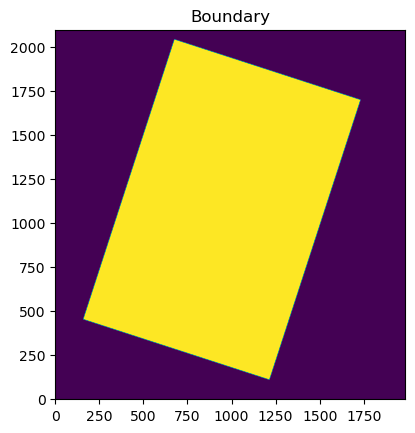

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
reload(un)

vertices = [(600, 60), (40, 823), (832, 1400), (1280, 770)]

Hbeta = un.SST_data_from_multiple_fits_files(timeframe_to_filename_fits,spectfilename='line_data/wav_sstHbeta.npy', number_of_frames=maximum,
                 time=time_list, name_of_line='Hbeta23', thresh=[0, np.percentile(datacube(0), 99.5)],  boundary_methode='search', 
                 boundary_arguments = {"error":0.01}, with_stokes=True, with_time=True, alternative_datacube=datacube)

Hbeta.boundary


In [11]:
secs = un.get_TIME(Hbeta)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} seconds for this line!")
print(f'{Hbeta.shape=}')

the mean cadence is 25.0 seconds for this line!
Hbeta.shape=(124, '??', 36, 2097, 1987)


The guessed filters are [[5.5, 4.5], [17.5, 4.5], [29.5, 4.5]]


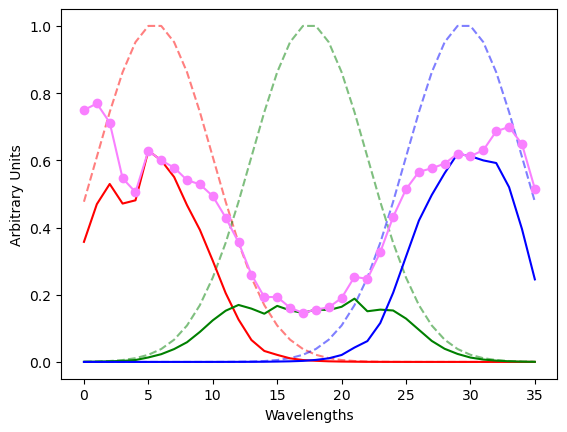

In [12]:
# %matplotlib inline
Hbeta.update_filters(None)# [[3,2], [7,2], [11,2]]
Hbeta.plot_filt(880,900)
plt.show()

the number of frames is 124
frame number 0 at time 17:01:15.37605


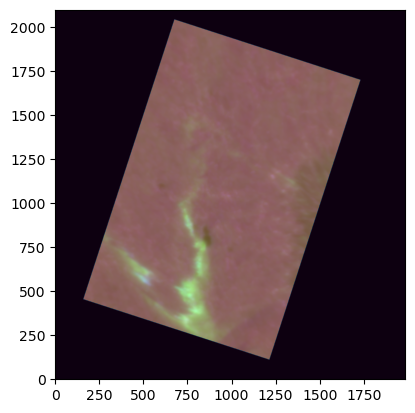

(2097, 1987, 3)


In [13]:
# %matplotlib widget
print(f'the number of frames is {Hbeta._number_of_frames}')
for frame in range(0 ,Hbeta._number_of_frames, 190):
    # frame=0
    Hbeta.ccp_frame(frame,Show=False)
    print(f'frame number {frame} at time {Hbeta._time[frame]}')
    plt.imshow(Hbeta.current_ccp, origin='lower')
    plt.imshow(Hbeta.calculate_boundary(frame=frame), alpha=0.2, origin="lower")

    # plt.imshow(Hbeta.boundary, origin='lower', alpha=0.2)
    plt.show()
    print(np.shape(Hbeta.current_ccp))#,np.shape(Hbeta.boundary))

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# plt.title('frame 40 jeweet')

frame = 37
Hbeta.ccp_frame(frame,Show=False)


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
Hbeta.frame_integrated_spect(frame)
ax[0].plot(Hbeta._wavel, Hbeta.av_spect, label='sst data')
ax[0].legend()
ax[1].imshow(Image.fromarray(Hbeta.current_ccp), origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()


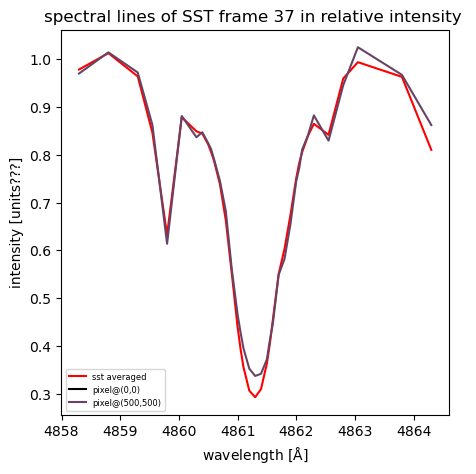

In [ ]:
Hbeta.current_ccp[0:30:10,0:60:20,:]
Hbeta.plot_integrate_spectr(frame, pixels=[[0,0],[500,500]])

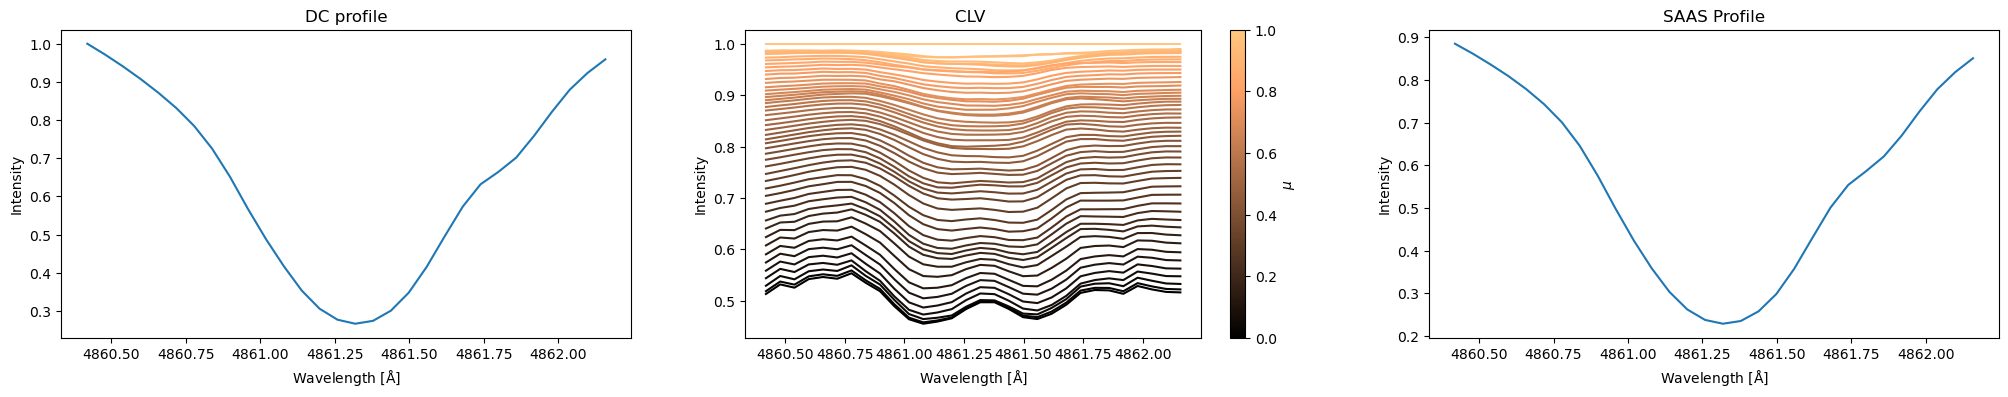

4861.288539927959 4861.288477594625


In [ ]:
reload(un)
theor_Hbeta = un.linestudier('E:/solar flares/data/2017-09-06/fits/4861_clv.fits', atlas=None, nr=101)
print(np.median(theor_Hbeta.sst_wav), np.mean(theor_Hbeta.sst_wav))

## Calculating the $\mu$ !!!!! 


In [ ]:
Hbeta.shape

(124, '??', 36, 2097, 1987)

In [ ]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s

with f.open(Hbeta.filename) as io:
    for i, hdu in enumerate(io):
        # print(f"HDU {i+1}:")
        print(add_enters(str(hdu.header), length_row=79))
        try: 
            x= hdu.header['CRVAL1A']
            y = hdu.header['CRVAL2A']
            print("x =", x, "y=", y)
            pix_x= hdu.header['CRPIX1A']
            pix_y = hdu.header['CRPIX2A']
            print("middel pixel x =", pix_x, "middel pixel y =", pix_y)
        except KeyError:
            # raise(KeyError)
            pass


SIMPLE  =                    T / Written by IDL:  Fri Jun 23 19:46:07 2023     
 BITPIX  =                  -32 /                                               
 NAXIS   =                    5 / Number of data axes                           
 NAXIS1  =                 1987 / Number of positions along axis 1              
 NAXIS2  =                 2097 / Number of positions along axis 2              
 NAXIS3  =                   36 / Number of positions along axis 3              
 NAXIS4  =                    1 / Number of positions along axis 4              
 NAXIS5  =                  124 / Number of positions along axis 5              
 EXTEND  =                    T / The file has extension(s).                    
 EXTNAME = 'Main'                                                               
 TIMESYS = 'UTC     '           /                                               
 DATE    = '2023-07-24T15:24:25' / Creation UTC date of FITS header             
 FILENAME= 'nb_4846_2023-06-0

In [ ]:
xy = pos[0][0][:,:,:,:, :2]
# seems to be centers per frame but different from those in the header???
xy, np.shape(xy), xy[29,0]

(array([[[[[-647.95129536, -391.46776162],
           [-572.68189536, -391.46776162]],
 
          [[-647.95129536, -312.02936162],
           [-572.68189536, -312.02936162]]],
 
 
         [[[-647.95129536, -391.46776162],
           [-572.68189536, -391.46776162]],
 
          [[-647.95129536, -312.02936162],
           [-572.68189536, -312.02936162]]],
 
 
         [[[-647.95129536, -391.46776162],
           [-572.68189536, -391.46776162]],
 
          [[-647.95129536, -312.02936162],
           [-572.68189536, -312.02936162]]],
 
 
         ...,
 
 
         [[[-647.95129536, -391.46776162],
           [-572.68189536, -391.46776162]],
 
          [[-647.95129536, -312.02936162],
           [-572.68189536, -312.02936162]]],
 
 
         [[[-647.95129536, -391.46776162],
           [-572.68189536, -391.46776162]],
 
          [[-647.95129536, -312.02936162],
           [-572.68189536, -312.02936162]]],
 
 
         [[[-647.95129536, -391.46776162],
           [-572.68189536, -391.46

width = 132.73000000000002
[-632.38854106 -557.11914106 -391.95160583 -312.51320583]
does MU contain nan's? False
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.6934734898500738 for timeframe 62
Coundourplot succesfully saved.


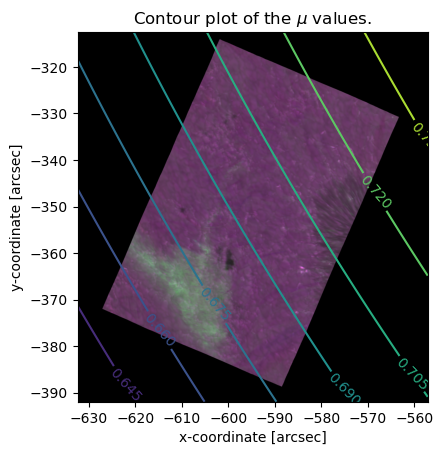

In [ ]:
def calculate_mu(x,y, radius=959.63):
    # sourcery skip: inline-immediately-returned-variable
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    mu  = (1-(x**2 + y**2)/radius**2)**0.5
    return mu

width = 0.13 * np.average(Hbeta.shape[-2:])/2
print(f"{width = }")

# or per pixel 0.13 arcsec

position = (x,y)



fxp = np.array(xy[maximum//2,0,0,:,0])
fyp = np.array(xy[maximum//2,0,:,0,1])
fxp = np.concatenate((fxp, fyp))
print(fxp)

x = np.linspace(fxp[0], fxp[1], Hbeta.shape[4])
y = np.linspace(fyp[0], fyp[1], Hbeta.shape[3])

xx, yy = np.meshgrid(x, y)
xx0=xx
yy0=yy

MU = calculate_mu(xx,yy)
print("does MU contain nan's?", np.any(np.isnan(MU)))


reload(un)

def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]




def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name=""):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.frame_integrated_spect(timeFrame)
        ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
        B = over.boundary
        B = np.where(B == 1, 1, np.nan)
        K = MU * B
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    CS = ax.contour(X, Y, MU)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 
mu = give_mu_contourplot(MU, xx, yy, fxp, over=Hbeta, save=True, save_name=Hbeta.name_of_line, timeFrame=maximum//2)
sst_data = Hbeta
theor_line = theor_Hbeta
set_mu(Hbeta, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_Hbeta.index_mu], theor_line.sst_clv[theor_Hbeta.index_mu][0], clv_fit(mu, theor_line)


(210, 199) (210, 199) (209, 198)


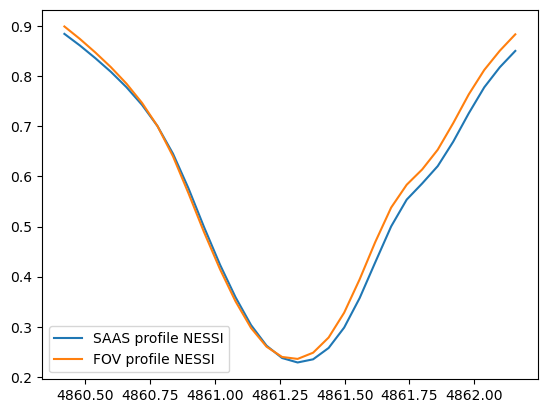

In [ ]:
theor_Hbeta.set_fov( xx, yy, Hbeta.boundary, sr=959.63, reduction=10)



## Finding a suitable quiet sun patch

In [ ]:
frame, Hbeta.shape

(37, (124, '??', 36, 2097, 1987))

<>:41: SyntaxWarning: invalid escape sequence '\C'
<>:41: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_7228\3147412914.py:41: SyntaxWarning: invalid escape sequence '\C'
  fig.savefig(f'plots\Choosing_quiet_sun_patch_Hbeta.png')
E:\solar flares/data/2017-09-06\use_nessi3.py:1078: RuntimeWarning: Mean of empty slice
  np.array([np.nanmean(self.datacube(frame)[i,ymin:ymax,xmin:xmax]) for i in range(len(self._wavel))]) / self.scalar + corr


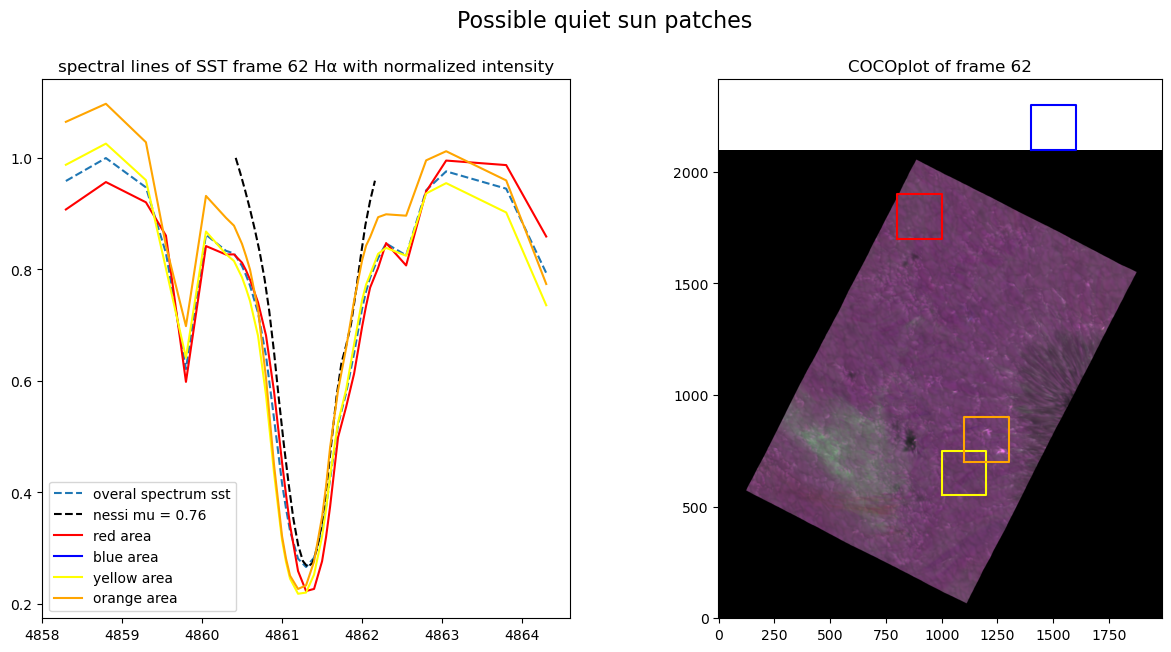

In [ ]:
frame=maximum//2

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

Hbeta.ccp_frame(frame,Show=False)
# xlim, ylim
X = [[(800,1000),(1700,1900)], [(1400,1600), (2100, 2300)],  [(1000,1200),(550,750)], [(1100,1300),(700, 900)]]
    #  [(90,350), (800,969)] , [(90,290), (870,969)] ]# max x: 963, y: 969
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
Hbeta.frame_integrated_spect(frame)
ax[0].plot(Hbeta._wavel, Hbeta.av_spect, '--', label='overal spectrum sst')
# ax[0].plot(theor_Hbeta.sst_wav + theta[0], theta[2] * theor_Hbeta.sst_dc + theta[1], label='saas nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = [0,0,1]


ax[0].plot(theor_Hbeta.sst_wav + theta[0], theta[2] * theor_Hbeta.sst_dc*theor_Hbeta.sst_clv[0] + theta[1], '--', label='nessi mu = 0.76', color='black')

ax[1].imshow(Hbeta.current_ccp,origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(Hbeta._wavel, Hbeta.frame_integrated_spect(frame, xlim=xlim, ylim=ylim), color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_Hbeta.png')
plt.show()


### The quiet sun patch

fill in here which color the wanted quiet sun patch had 

In [ ]:
color_wanted_patch = 'red'

the edges of the patch are denoted by the xlim: (800, 1000) and ylim: (1700, 1900)


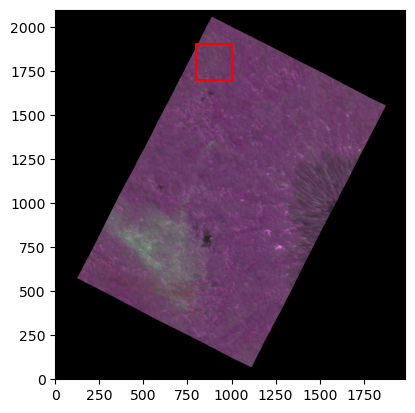

{'frame': 62, 'xlim': (800, 1000), 'ylim': (1700, 1900), 'color': 'red'}

In [ ]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

Hbeta.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
Hbeta.quiet_sun

The quiet sun is pick at x (-598.2974910602967, -323.750555832786) with average              mu 0.7053158472857679


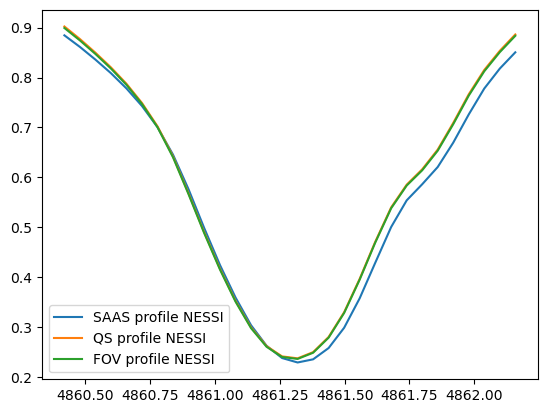

In [ ]:
theor_Hbeta.set_quiet_sun(xlim=xlim, ylim=ylim, show=False)


[4858.29756366 4858.79756366 4859.29756366 4859.54756366 4859.79756366
 4860.04756366 4860.29756366 4860.39756366 4860.49756366 4860.54756366
 4860.59756366 4860.69756366 4860.79756366 4860.89756366 4860.99756366
 4861.04756366 4861.09756366 4861.19756366 4861.29756366 4861.39756366
 4861.49756366 4861.54756366 4861.59756366 4861.69756366 4861.79756366
 4861.89756366 4861.99756366 4862.04756366 4862.09756366 4862.19756366
 4862.29756366 4862.54756366 4862.79756366 4863.04756366 4863.79756366
 4864.29756366] [0.90745687 0.95662701 0.92034686 0.86060959 0.5983268  0.84187061
 0.82666546 0.82696354 0.81210071 0.79836667 0.78163737 0.74096334
 0.68157125 0.58115655 0.45394218 0.39567545 0.34155601 0.25905007
 0.22319205 0.22700703 0.27657339 0.32033837 0.37427792 0.49908939
 0.55296743 0.61300343 0.69698811 0.73473901 0.76729363 0.8027457
 0.84722245 0.80711406 0.939722   0.99518615 0.98706871 0.8589766 ] [1.79422729 1.58400419 1.37378109 1.26866954 1.16355799 1.05844644
 0.95333489 0.9112

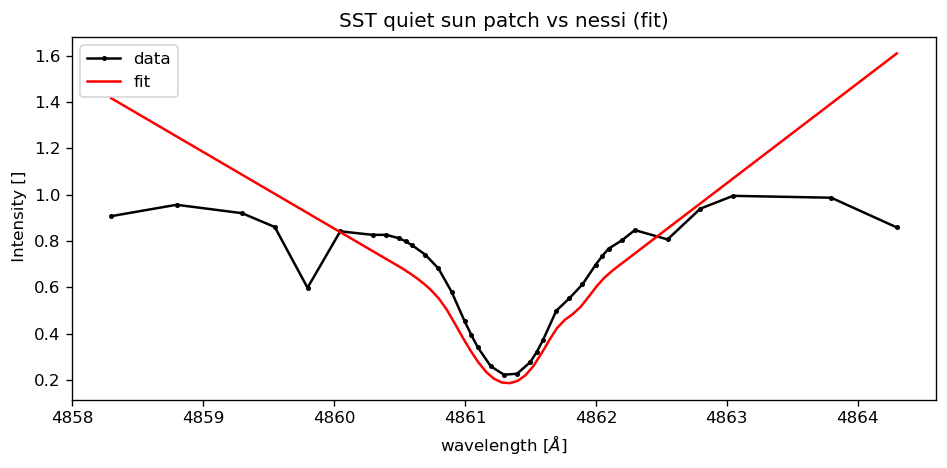

de p-waarde is  2.327903019760925e-12 
Chi^2 reduced= 125.17504119902688 
aantal vrijheidgraden= 34 
chi^2= 4255.951400766914
we behouden de fit tot op een betrouwbaarheidsniveau van  2.327903019760925e-12 
Oftewel verwerp als p-waarde <lpha-niveau 


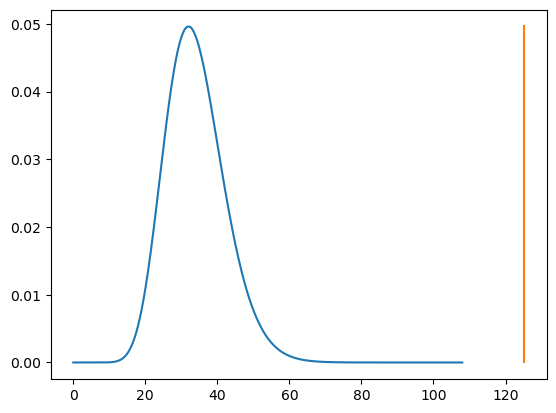

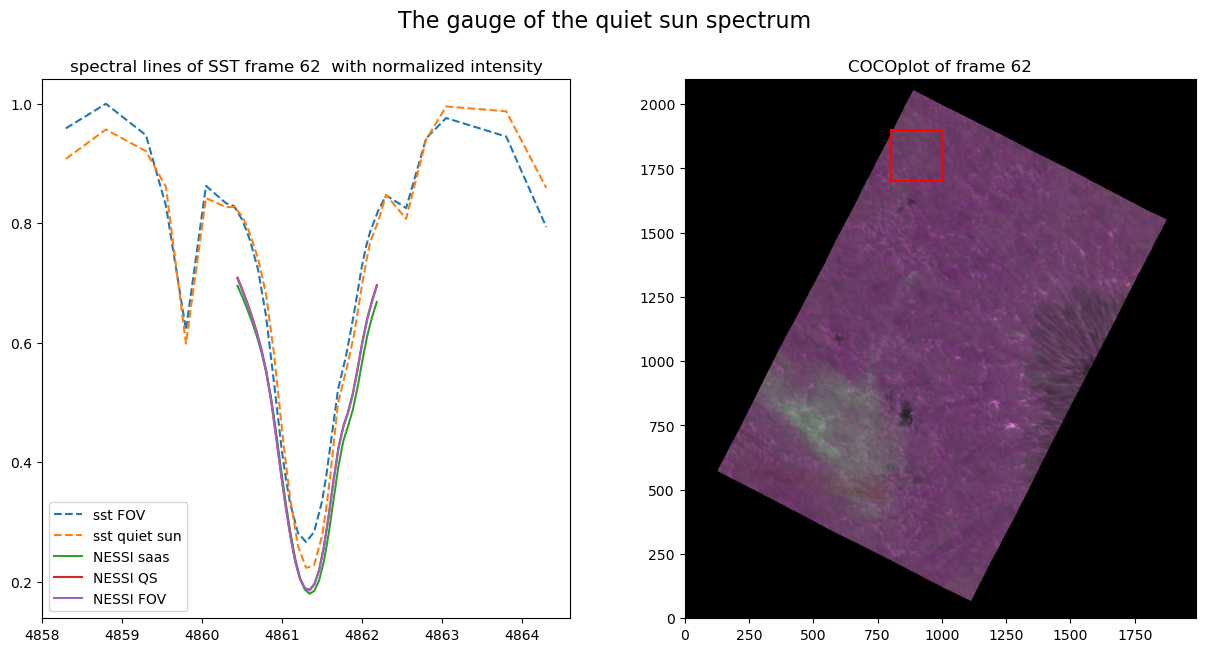

In [ ]:
reload(un)
un.fit_qs_to_NESSI(theor_Hbeta, Hbeta)

Here it seems that there is that the altlas is horizontally elongated compared to the data. Maybe its important to remark this!

--------------------------------------------------------------------------------------------------
tot hier

## The full FOV integrated spectrum over time:

In [ ]:
sst_data = Hbeta
Hbeta.shape

(124, '??', 36, 2097, 1987)

In [ ]:
Hbeta.calculate__FOV_spect_over_time()

In [ ]:
sst_data.quiet_sun

{'frame': 62, 'xlim': (800, 1000), 'ylim': (1700, 1900), 'color': 'red'}

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [7] at time ['t=17:04:10 UT'].
The areafactor for THIS flare is 0.0009180409492344948 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 73.78%.


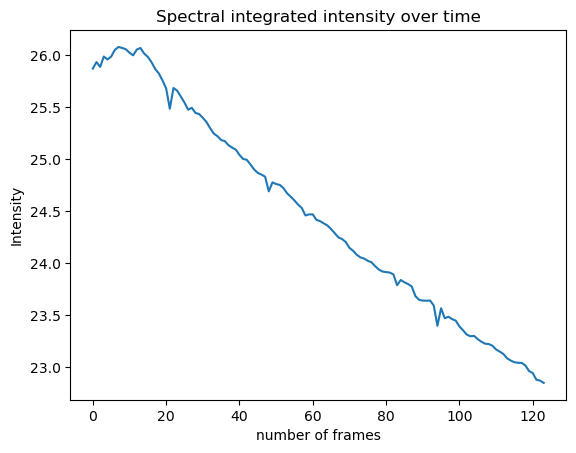

In [ ]:
reload(un)
un.save_for_further_analysis(Hbeta, theor_Hbeta)


# Movie Making

In [ ]:
# fill in here all arguments
theor_line = theor_Hbeta
sst_data = Hbeta
name_of_flare = "M2.5"
name_of_line = "Hbeta"

un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line, step=1, show_boundary=False)

The filename E:/solar flares/data/animations/M25_Hbeta_animation.mp4 already exist


In [ ]:
exit()